# Task 1: Prediction using supervised ML

### By: Mayukh Nath
##

Given a student's number of study hours, predicting his percentage score using simple linear regression


In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#next, the data is loaded from the url into a pandas dataframe

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data imported")

Data imported


In [4]:
data.head()                    #displaying the first 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


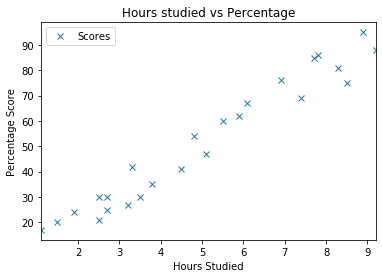

In [5]:
data.plot(x='Hours', y='Scores', style='x')             #plotting a scatterplot of the data
plt.title('Hours studied vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [6]:
X = data.iloc[:, :-1].values                        #processing the data into features and labels
y = data.iloc[:, 1].values  

In [7]:
from sklearn.model_selection import train_test_split                    #splitting the data into train and test sets for training and evaluation respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [8]:
from sklearn.linear_model import LinearRegression                    #training the data with the help of scikit-learn's Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

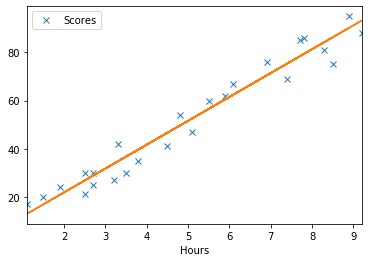

In [9]:
line = lin_reg.coef_*X+ lin_reg.intercept_                           # Plotting the regression line           

data.plot(x='Hours', y='Scores', style='x')                          # Plotting the data

plt.plot(X, line)
plt.show()

In [10]:
y_pred = lin_reg.predict(X_test)                    #Calculating the predictions for our test set
y_pred=np.minimum(y_pred,100.)                      #The predictions are capped at 100% since the percentage score can't go beyond

In [11]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})        #comparing actual and predicted values for test set
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [12]:
from sklearn.metrics import mean_squared_error        #evaluating the model on the test set with the help of root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

4.6474476121003665

In [13]:
hours = [[9.5]]                                            #predicting the score for any value of "hours studied"
own_pred =np.minimum(lin_reg.predict(hours),100.)
print("No of hours  studied= {}".format(hours[0]))
print("Predicted Score = {}".format(own_pred[0]))     

No of hours  studied= [9.5]
Predicted Score = 96.16939660753593
